<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>

<div style="text-align: center;">
    <img src="micromaster.png" width=170 alt="micromaster_logo">
    <br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=6>
    <b>Sharif Micromaster</b>
     <br>
<font color=0F5298 size=6>
   Programming For Data Analysis ~ Winter 2024
  <br>
<font color=606060 size=5>
    Assignment 4: Introduction to Pandas, Matplotlib, Seaborn 
</div>
</body>
</html>
<hr>

<div><font face="Times New Roman" size=6><div dir=ltr align=left><font color=686880 size=4>
    Name: Rosa Adib Rad
    <br>
    No.: 0905730708

## Notebook Content
0. [Introduction](#Introduction)
1. [Importing Libraries](#importing-libraries)
2. [Loading Dataset](#loading-dataset)
3. [Basic Understanding of Dataset](#basic-understanding-of-dataset)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Data Pre-Processing](#data-pre-processing)

# Introduction
This project aims to perform data preparation and initial analysis on a real estate dataset. The dataset includes information about properties from both sales and rental listings, sourced from various sources. The goal is to gain insights into the characteristics of the real estate market and prepare the data for further analysis or modeling.

### **Project Steps**

1. Data Loading and Inspection
   - **Data Collection**: Real estate data is collected from multiple sources, including online listings and databases.
   - **Initial Inspection**: The structure and basic characteristics of the dataset are examined, including the number of records, columns, and data types.


2. Data Preprocessing
   - **Duplicate Data Removal**: Any duplicate records in the dataset are identified and removed to ensure data integrity.
   - **Data Type Identification**: The data types of columns are determined, and appropriate conversions are made if necessary.
   - **Missing Data Handling**: Missing values in the dataset are addressed through imputation or removal, depending on the context.
   - **Outlier Detection**: Outliers in the data, which may skew analysis results, are identified and processed using statistical methods.
   - **Feature Engineering**: New features are created based on existing ones to enhance the predictive power of the dataset.


3. Data Analysis and Exploration
   - **Correlation Analysis**: Relationships between different variables in the dataset are explored using correlation matrices and visualizations.
   - **Distribution Analysis**: The distribution of key variables, such as price and area, is examined to understand their patterns and characteristics.
   - **Visualization**: Various plots and charts are created to visualize the data and gain insights into underlying trends and patterns.


4. Data Modeling Preparation
   - **Feature Selection**: Relevant features for modeling are selected based on their importance and contribution to the target variable.
   - **Data Splitting**: The dataset is divided into training and testing sets to facilitate model training and evaluation.


5. Conclusion
   - This project serves as a foundational step in the analysis of real estate data. By preparing the dataset and performing initial exploratory analysis, it sets the stage for further analysis or modeling tasks. The insights gained from this project can be used by stakeholders in the real estate industry for decision-making and strategic planning.


### Importing Libraries


In [1]:
# TODO: Import Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
# TODO: Load dataset.csv 
data = pd.read_csv("dataset.csv")

## Basic Understanding of Dataset

In [3]:
# TODO: Print Shape of our Dataset
data.shape

(3479, 8)

In [4]:
# TODO: Print Columns of Dataset
data.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [5]:
# TODO: Print first 5 rows of the dataset
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [6]:
# TODO: Print last 5 rows of the dataset
data.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [7]:
# TODO: Number of Duplicated in our dataset
data[data.duplicated()]
print("Number of duplicated values (True) and non duplicated values( False):\n", data.duplicated().value_counts())
print("Index of duplicated values:\n", data.loc[data.duplicated()])
# TODO: The percentage of Duplicated in our dataset
print("\n\nThe percentage of Duplicated: ", data.duplicated().sum() / data.shape[0] * 100)

Number of duplicated values (True) and non duplicated values( False):
 False    3271
True      208
Name: count, dtype: int64
Index of duplicated values:
      Area  Room  Parking  Warehouse  Elevator            Address  \
55     61     1     True       True     False              Punak   
78     74     2     True       True      True            Amirieh   
79     88     3    False      False      True             Parand   
80     63     1     True       True      True              Punak   
81    114     3     True       True      True         Sattarkhan   
...   ...   ...      ...        ...       ...                ...   
3449   80     2     True       True      True              Punak   
3451   88     2     True       True      True  Central Janatabad   
3459   80     2     True       True      True        Ostad Moein   
3461   55     1     True       True      True              Punak   
3476   75     2    False      False     False             Parand   

             Price  Price(USD

In [8]:
# TODO: Types of our Columns in Dataset
data.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

**Description**<br>

* Except Area feature , all of them have right type . we have to change its type later .<br>


In [9]:
# TODO: Print the number of missing values in our Dataset for each Column
print("Number of missing values:\n", data.isna().sum())
print("\n\nThe percentage of missing values:\n", data.isna().sum() / data.shape[0] * 100)

Number of missing values:
 Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


The percentage of missing values:
 Area          0.00000
Room          0.00000
Parking       0.00000
Warehouse     0.00000
Elevator      0.00000
Address       0.66111
Price         0.00000
Price(USD)    0.00000
dtype: float64


**Description**<br>

* Due to Address feature plays an important role and it must be exact, we can't replace missing values with anything.
* Consequently, we will drop those missing values later.

In [10]:
# TODO: Print the cardinality of our Columns
print("The number of unique values of each column is:")
for col in data:
    print(col, len(data[col].unique()))

The number of unique values of each column is:
Area 243
Room 6
Parking 2
Warehouse 2
Elevator 2
Address 193
Price 934
Price(USD) 932


## Exploratory Data Analysis

<Axes: xlabel='Price(USD)', ylabel='Count'>

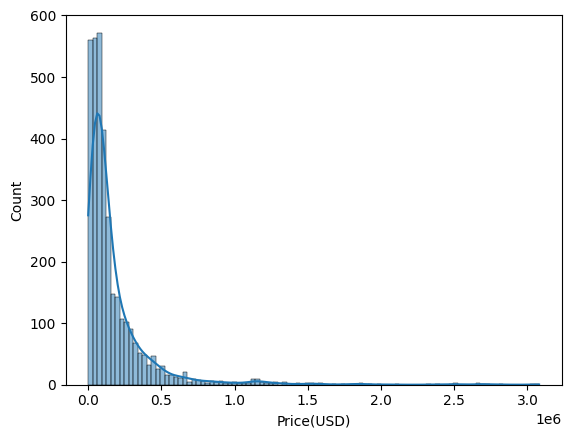

In [11]:
# TODO: Plot the distribution of prices from the dataset using a histogram with kernel density estimation enabled, specifying a palette and setting the number of bins to 100.
sns.histplot(x='Price(USD)',data=data , bins=100, kde=True)

**Description**<br>

* Most houses have roughly close price in one third of the first part
* Outliers are obvious now(on the right side)

<Axes: xlabel='Room', ylabel='Count'>

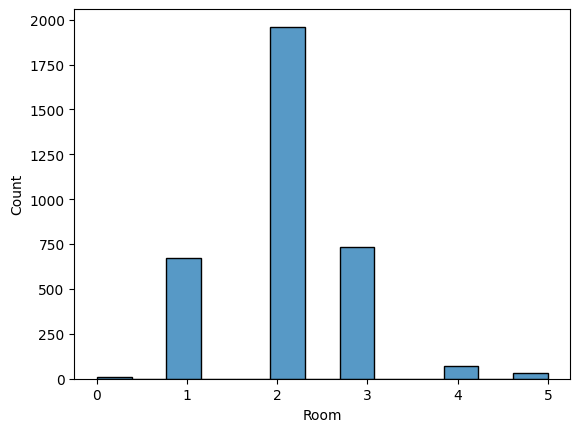

In [12]:
# TODO: Visualize the distribution of the number of rooms (Room) from the dataset using a histogram.
sns.histplot(x='Room',data=data)

**Description**<br>

* About 2000 houses have exactly 2 rooms (most houses) 
* Distribution of 1 and 3 rooms are roughly the same (a little more 3 rooms)
* we have not many houses with 4 or 5 rooms (in total about 150 houses)
* houses without room is rarely seen 

**Conclusion**
* Mean of rooms is roughly 2.

<Axes: xlabel='Elevator', ylabel='count'>

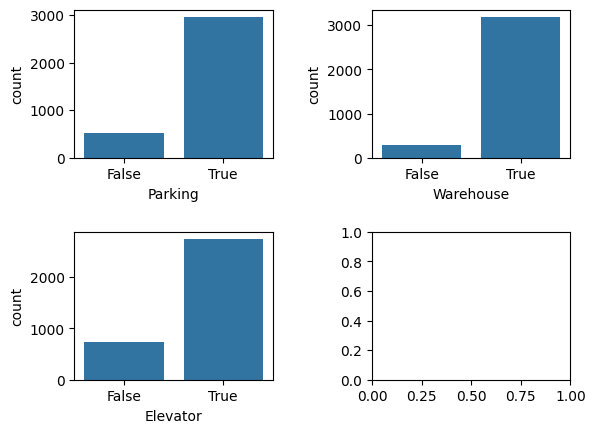

In [13]:
# TODO: Create subplots to visualize the distribution of boolean columns ('Parking', 'Warehouse', 'Elevator') from the dataset using countplots.
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
sns.countplot(data, x="Parking", ax=axes[0,0])
sns.countplot(data, x="Warehouse", ax=axes[0,1])
sns.countplot(data, x="Elevator", ax=axes[1,0])

**Description**<br>

* Most houses have Parking , Warehouse and Elevator (all these three features )
* Most houses have Warehouse.(houses without warehouse are very low)
* Those houses without Parking and Elevator have the same distribution(less than 1000 more than 500)


## Feature Engineering

In [14]:
# TODO: Display the data types of columns in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


**Description**<br>

The type of Area must be changed if we want to show and do feature engineering .<br>

To be possible to change its type we need to remove comma between numbers than we are capable changing its type.


In [15]:
# TODO: Remove commas from the 'Area' column and convert it to numeric data type.
import warnings, math
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i in range(data.shape[0]):
        d = data['Area'].loc[i].split(',')
        data['Area'].loc[i] = float(''.join(d).strip())

In [16]:
# TODO: Generate descriptive statistics for the 'Area' column in the dataset.
data['Area'].describe()

count     3479.0
unique     243.0
top         75.0
freq       111.0
Name: Area, dtype: float64

**Description**<br>

We are going to divide Area feature to 4 category : Small(0-30) - AveUnderMean(30-90) - AveUpperMean(90-120)- High(120-...)

except these features other will be replaced to nan values

In [17]:
# TODO: Create a new feature 'AreaSize' based on the 'Area' column values, categorizing them as 'Small', 'AveUnderMean', 'AveUpperMean', or 'High'.
AreaSize = []
for i in range(data.shape[0]):
    dtemp = data['Area'].loc[i]
    
    if dtemp>0 and dtemp<30:
        AreaSize.append("Small")
        
    elif dtemp>=30 and dtemp<90:
        AreaSize.append("AveUnderMean")
        
    elif dtemp>=90 and dtemp<120:
        AreaSize.append("AveUpperMean")
        
    else:
        AreaSize.append("High")

data['AreaSize'] = AreaSize
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,AveUnderMean
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,AveUpperMean
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,High
...,...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,AveUnderMean
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67,AveUnderMean
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67,AveUnderMean
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67,AveUpperMean


<Axes: xlabel='AreaSize', ylabel='count'>

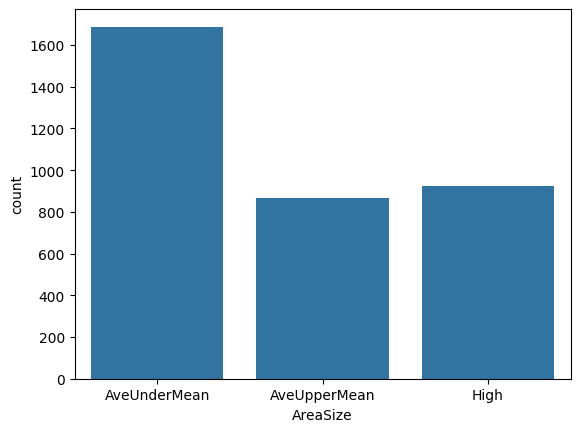

In [18]:
# TODO: Visualize the distribution of the 'AreaSize' feature using a countplot.
sns.countplot(data=data, x='AreaSize')

**Description**<br>

* As we can see  about half of houses have between 30-90 meters(m2)
* Houses with 90-120 meters  have the same contribution with houses which have more than 120 meters
* we can realize that right-skewed has happened.(outliers most are on the right part)
* very low houeses are with less than 30 meters size.


We are going to determine 4 level for Price feature : Cheap , AveUnderMean , AveUpperMean , Expensive <br>

- `cheap` : 0-25% 
- `AveUnderMean` : 25%-50%
- `AveUpperMean` : 50%-75%
- `Expensive` : upper 75%

In [19]:
# TODO: Create a new feature 'PriceLevel' based on the 'Price' column values, categorizing them as 'Cheap', 'AveUnderMean', 'AveUpperMean', or 'Expensive'.
PriceLevel = []
q1 = data['Price'].describe()["25%"]
q2 = data['Price'].describe()["50%"]
q3 = data['Price'].describe()["75%"]

for i in range(data.shape[0]):
    dtemp = data['Price'].loc[i]
    
    if dtemp<q1:
        PriceLevel.append("cheap")
        
    elif dtemp>=q1 and dtemp<q2:
        PriceLevel.append("AveUnderMean")
        
    elif dtemp>=q2 and dtemp<q3:
        PriceLevel.append("AveUpperMean")
        
    elif dtemp>=q3:
        PriceLevel.append("Expensive")

data['PriceLevel'] = PriceLevel
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,AveUnderMean,cheap
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,AveUpperMean,cheap
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,High,Expensive
...,...,...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,AveUnderMean,AveUpperMean
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67,AveUnderMean,Expensive
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67,AveUnderMean,cheap
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67,AveUpperMean,AveUpperMean


<Axes: xlabel='PriceLevel', ylabel='count'>

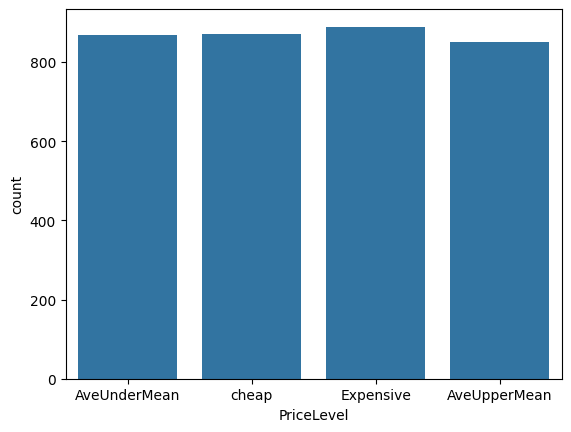

In [20]:
# TODO: Visualize the distribution of the 'PriceLevel' feature using a countplot.
sns.countplot(data=data, x='PriceLevel')

**Description**<br>

We have very balanced distribution in 4 parts

## Data Pre-Processing

In [21]:
# TODO: Display a random sample of 10 rows from the dataset.
rand = (np.random.randint(len(data), size=(10)))
data.loc[rand]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
1424,100.0,2,True,True,True,Punak,5.650000e+09,188333.33,AveUpperMean,AveUpperMean
1857,122.0,2,True,True,True,Jeyhoon,3.900000e+09,130000.00,High,AveUpperMean
672,53.0,1,True,True,False,East Ferdows Boulevard,1.920000e+09,64000.00,AveUnderMean,AveUnderMean
2222,53.0,1,False,True,False,Baghestan,4.500000e+08,15000.00,AveUnderMean,cheap
3428,63.0,3,True,True,False,Shoosh,1.200000e+09,40000.00,AveUnderMean,cheap
3129,42.0,1,False,True,False,Shoosh,9.200000e+08,30666.67,AveUnderMean,cheap
901,110.0,3,True,True,True,Jeyhoon,2.330000e+09,77666.67,AveUpperMean,AveUnderMean
2696,94.0,2,False,True,False,Northren Jamalzadeh,2.400000e+09,80000.00,AveUpperMean,AveUnderMean
2065,87.0,2,True,True,True,Pardis,4.960000e+08,16533.33,AveUnderMean,cheap
201,270.0,4,True,True,True,Farmanieh,3.780000e+10,1260000.00,High,Expensive


In [22]:
# TODO: Calculate the number and percentage of missing values for each column in the dataset and display the results. Highlight the column with the maximum percentage of missing values in red.
missingValues = pd.DataFrame({"NaN count":data.isna().sum(),
                             "NaN Percentage":data.isna().sum()/len(data)*100})
missingValues["NaN Percentage"].max()

0.6611095142282265

    
**Description**<br>

Address (location of house) is crucial , wa cant replace missing values with like(most frequent)
(if we do that our model doesnt have good prediction) <br>
So , we easily drop those missing values

In [23]:
# TODO: Remove rows with missing values from the dataset.
data = data.dropna().reset_index(drop=True)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,AveUnderMean,cheap
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,AveUpperMean,cheap
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,High,Expensive
...,...,...,...,...,...,...,...,...,...,...
3451,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,AveUnderMean,AveUpperMean
3452,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67,AveUnderMean,Expensive
3453,75.0,2,False,False,False,Parand,3.650000e+08,12166.67,AveUnderMean,cheap
3454,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67,AveUpperMean,AveUpperMean


In [24]:
# TODO: Confirm that there are no missing values remaining in the dataset after removing them.
data.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
AreaSize      0
PriceLevel    0
dtype: int64

In [25]:
# TODO: Identify and count duplicated values in the dataset. Calculate and print the percentage of duplicated values.
print(data.duplicated().sum())
print(data.loc[data.duplicated])

208
       Area  Room  Parking  Warehouse  Elevator            Address  \
54     61.0     1     True       True     False              Punak   
77     74.0     2     True       True      True            Amirieh   
78     88.0     3    False      False      True             Parand   
79     63.0     1     True       True      True              Punak   
80    114.0     3     True       True      True         Sattarkhan   
...     ...   ...      ...        ...       ...                ...   
3426   80.0     2     True       True      True              Punak   
3428   88.0     2     True       True      True  Central Janatabad   
3436   80.0     2     True       True      True        Ostad Moein   
3438   55.0     1     True       True      True              Punak   
3453   75.0     2    False      False     False             Parand   

             Price  Price(USD)      AreaSize    PriceLevel  
54    2.030000e+09    67666.67  AveUnderMean  AveUnderMean  
77    1.700000e+09    56666.67  A

**Description**<br>

We have 208 duplicated values .
We can easily drop them

In [26]:
# TODO: Remove duplicated rows from the dataset, reset the index, and drop the old index column.
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,AveUnderMean,cheap
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,AveUpperMean,cheap
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,High,Expensive
...,...,...,...,...,...,...,...,...,...,...
3243,63.0,1,True,True,False,Feiz Garden,1.890000e+09,63000.00,AveUnderMean,AveUnderMean
3244,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,AveUnderMean,AveUpperMean
3245,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67,AveUnderMean,Expensive
3246,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67,AveUpperMean,AveUpperMean


In [27]:
# TODO: Print the new shape of the dataset after removing duplicated rows and resetting the index.
data.shape

(3248, 10)

In [28]:
# TODO: Display the data types of columns in the dataset after any transformations or modifications.
data.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
AreaSize       object
PriceLevel     object
dtype: object

**Description**<br>
* About dtypes every thing is fine . <br>
* We are going to check and discover each feature .

In [29]:
# TODO: Calculate the count and mean price for each category of the 'AreaSize' feature and display the results, sorted by 'AreaSize' in descending order.
data.groupby("AreaSize")["Price"].agg(["mean","count"]).sort_values("AreaSize",ascending=False)

,mean,count
AreaSize,,
High,1.306571e+10,875
AveUpperMean,4.069552e+09,815
AveUnderMean,1.953623e+09,1558


**Description**<br>

* Obviously with increasing the meter of a house the price will raise and Mean will be raised too . <br>

* Distribution of houses according to Meter is : AveUnderMean - High - AveUpperMean - Small 

* There is just a house with a small size.(it's an outlier)

In [30]:
# TODO: Calculate the percentage distribution and mean price for each category of the 'Room' feature and display the results, sorted by room number.
data.groupby("Room")["Price"].agg(["mean","count"]).sort_values("Room",ascending=True)

,mean,count
Room,,
0,8.715556e+09,9
1,1.717832e+09,625
2,3.363038e+09,1819
3,1.104311e+10,694
4,2.568122e+10,68
5,3.373439e+10,33


    
**Description**<br>

We can see the distribution of houses with :   <br>
In row 2 , 3 , 1 , 4 , 5   and 0 rooms have the highest distribution. <br>

Mean price for each has been shown. <br>
Obviously, with raising the number of rooms the cost will be increased.<br>
(Duplicate the cost for each 1 room  (except 4rooms to 5rooms)

In [31]:
# TODO: Calculate the count and mean price for each category of the 'Parking' feature and display the results.
data.groupby("Parking")["Price"].agg(["mean","count"])

,mean,count
Parking,,
False,1.745254e+09,503
True,6.162136e+09,2745


**Description**<br>

* As we can see , most houses have parking (about 5.5x versus those without parking)<br>

* Those houses with parking have higher costs.(about fourfold)(transparently Parking is an important feature for price) 

In [32]:
# TODO: Calculate the count and mean price for each category of the 'Warehouse' feature and display the results.
data.groupby("Warehouse")["Price"].agg(["mean","count"])

,mean,count
Warehouse,,
False,2.545552e+09,279
True,5.753694e+09,2969


    
**Description**<br>

* Most houses have Warehouse (about 10x versus those without Warehouse)

* Houses with warehouse have higher costs . more than duoble

In [33]:
# TODO: Calculate the count and mean price for each category of the 'Elevator' feature and display the results.
data.groupby("Elevator")["Price"].agg(["mean","count"])

,mean,count
Elevator,,
False,3.740239e+09,697
True,5.952952e+09,2551


**Description**<br>

* Most houses have Elevator (about 4x versus those without Elevator)

* Houses with Elevator have higher costs .about 1.5X 

* Versus Parking and Warehouse  , Elevator has less influence on price


In [34]:
# TODO: Create a cross-tabulation between the 'Parking' and 'Room' features in the dataset.
pd.crosstab(data['Parking'], data['Room'], dropna=False)

Room,0,1,2,3,4,5
Parking,,,,,,
False,7,233,233,24,1,5
True,2,392,1586,670,67,28


**Description**<br>

* Most houses with 1 room or more have Parking.
* With raising the number of rooms , houses with Parking have increasingly raised.



In [35]:
# TODO: Calculate the mean price for each combination of 'Parking' and 'Warehouse' features in the dataset and round the results.
data.groupby(["Parking","Warehouse"])["Price"].agg("mean")

Parking  Warehouse
False    False        2.488763e+09
         True         1.312709e+09
True     False        2.657319e+09
         True         6.286411e+09
Name: Price, dtype: float64

**Description**

* It can be seen that houses with Warehouse and without Parking have less cost versus those houses with Parking.
* If both features exist in a house , the cost of the house will be high.


In [36]:
# TODO: Calculate the mean price for each combination of 'Room' and 'Warehouse' features in the dataset and round the results.
data.groupby(["Room","Warehouse"])["Price"].agg("mean")

Room  Warehouse
0     False        1.912075e+10
      True         3.914000e+08
1     False        1.376320e+09
      True         1.784436e+09
2     False        1.811028e+09
      True         3.495459e+09
3     False        7.692475e+09
      True         1.114253e+10
4     False        3.673333e+09
      True         2.669697e+10
5     False        9.927857e+09
      True         4.014385e+10
Name: Price, dtype: float64

**Description**<br>
* Except houses without room , with increasing the number of Rooms and Warehouse existance the cost will be increasingly raised.


In [37]:
# TODO: Display the unique values of the 'Address' column in the dataset.
data["Address"].unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [38]:
# TODO: Calculate and print the number of unique values in the 'Address' column of the dataset.
data["Address"].nunique()

192

**Description**<br>

Because we dont know that all names of addresses  have correct writing or human mistake has happened or not, we are going to 
remove any probable  problem in case of existance.

In [39]:
# TODO: Remove non-alphabetic characters from the 'Address' column in the dataset and display the first five rows.
import warnings, math
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i in range(data.shape[0]):
        d = ''.join([i for i in data['Address'].loc[i] if i.isalpha()])
        data['Address'].loc[i] = d

In [40]:
# TODO: Calculate and print the number of unique values in the 'Address' column of the dataset after removing non-alphabetic characters.
print(f"number of unique address values: {data["Address"].nunique()}")
print(f"unique address values:\n {data["Address"].unique()}")

number of unique address values: 192
unique address values:
 ['Shahran' 'Pardis' 'ShahrakeQods' 'ShahrakeGharb'
 'NorthProgramOrganization' 'Andisheh' 'WestFerdowsBoulevard' 'Narmak'
 'SaadatAbad' 'Zafar' 'Islamshahr' 'Pirouzi' 'ShahrakeShahidBagheri'
 'Moniriyeh' 'Velenjak' 'Amirieh' 'SouthernJanatabad' 'Salsabil'
 'Zargandeh' 'FeizGarden' 'WaterOrganization' 'ShahrAra' 'Gisha' 'Ray'
 'Abbasabad' 'OstadMoein' 'Farmanieh' 'Parand' 'Punak' 'QasrodDasht'
 'Aqdasieh' 'Pakdasht' 'Railway' 'CentralJanatabad' 'EastFerdowsBoulevard'
 'PakdashtKhatunAbad' 'Sattarkhan' 'Baghestan' 'Shahryar'
 'NorthernJanatabad' 'DaryanNo' 'SouthernProgramOrganization' 'Rudhen'
 'WestPars' 'Afsarieh' 'Marzdaran' 'Dorous' 'Sadeghieh' 'Chahardangeh'
 'Baqershahr' 'Jeyhoon' 'Lavizan' 'ShamsAbad' 'Fatemi'
 'KeshavarzBoulevard' 'Kahrizak' 'Qarchak' 'NorthrenJamalzadeh'
 'Azarbaijan' 'Bahar' 'PersianGulfMartyrsLake' 'Beryanak' 'Heshmatieh'
 'ElmoSanat' 'Golestan' 'ShahreZiba' 'Pasdaran' 'Chardivari' 'Gheitarieh'
 'Ka

In [41]:
# TODO: Find and store the top 10 most frequently occurring values in the 'Address' column.
address_filter = data.groupby("Address")["Address"].count().sort_values(ascending=False).head(10)
address_filter

Address
Punak                   148
WestFerdowsBoulevard    133
Gheitarieh              133
Shahran                 123
Pardis                  123
SaadatAbad              120
Parand                  119
ShahreZiba               91
Jeyhoon                  88
SouthernJanatabad        86
Name: Address, dtype: int64

<Axes: xlabel='Address'>

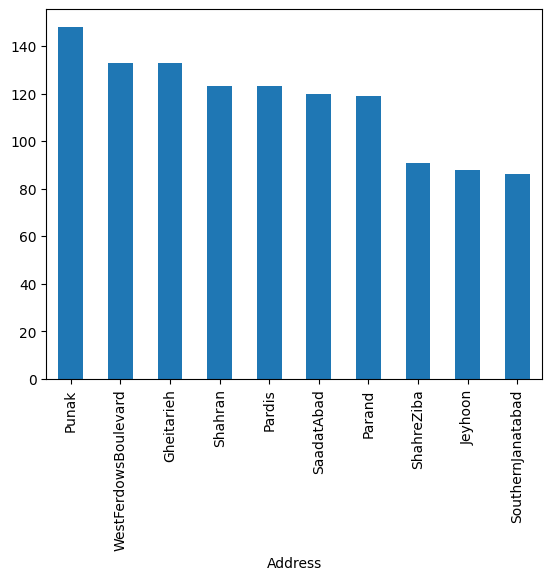

In [42]:
# TODO: Visualize the top 10 most frequently occurring values in the 'Address' column using a bar plot.
address_filter.plot(kind='bar')

In [43]:
# TODO: Calculate the mean price for each unique address in the dataset and store the results. Identify and store the top 10 addresses with the highest mean price.
mean_price = data.groupby("Address")["Price"].mean()
mean_price_top10 = mean_price.sort_values(ascending=False).head(10)
mean_price_top10

Address
Gandhi        7.000000e+10
Lavasan       4.800000e+10
Mahmoudieh    3.346667e+10
Vanak         3.270000e+10
Elahieh       2.678635e+10
Argentina     2.516500e+10
Zaferanieh    2.357515e+10
Velenjak      2.138136e+10
Farmanieh     2.066580e+10
Niavaran      1.986027e+10
Name: Price, dtype: float64

In [44]:
# TODO: Calculate and round descriptive statistics for the 'Price' column in the dataset.
data["Price"].describe().astype(int)


count          3248
mean    -2147483648
std     -2147483648
min         3600000
25%      1420000000
50%     -2147483648
75%     -2147483648
max     -2147483648
Name: Price, dtype: int32

In [45]:
# TODO: Create a copy of the dataset and format the 'Price' and 'Price(USD)' columns to display values with comma separators and no decimal places.
data2 = data.copy()
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i in range(len(data2)):
        data2["Price"].loc[i] =  f'{int(data2["Price"].loc[i]):,}' 
        data2["Price(USD)"].loc[i] =  f'{int(data2["Price(USD)"].loc[i]):,}'
data2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63.0,1,True,True,True,Shahran,"1,850,000,000","61,666",AveUnderMean,AveUnderMean
1,60.0,1,True,True,True,Shahran,"1,850,000,000","61,666",AveUnderMean,AveUnderMean
2,79.0,2,True,True,True,Pardis,"550,000,000","18,333",AveUnderMean,cheap
3,95.0,2,True,True,True,ShahrakeQods,"902,500,000","30,083",AveUpperMean,cheap
4,123.0,2,True,True,True,ShahrakeGharb,"7,000,000,000","233,333",High,Expensive
...,...,...,...,...,...,...,...,...,...,...
3243,63.0,1,True,True,False,FeizGarden,"1,890,000,000","63,000",AveUnderMean,AveUnderMean
3244,86.0,2,True,True,True,SouthernJanatabad,"3,500,000,000","116,666",AveUnderMean,AveUpperMean
3245,83.0,2,True,True,True,Niavaran,"6,800,000,000","226,666",AveUnderMean,Expensive
3246,105.0,2,True,True,True,Dorous,"5,600,000,000","186,666",AveUpperMean,AveUpperMean


**Description**<br>
* we create new variable to avoid changing the type of Price from numeric to object .
* Price and Price(USD) are easily readable now . 

<Axes: >

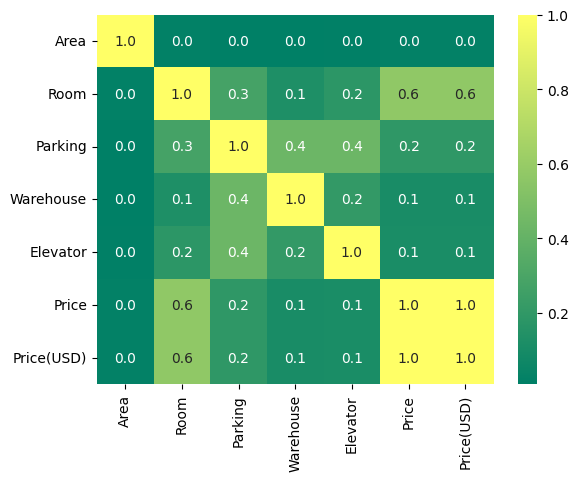

In [46]:
# TODO: Create a heatmap to visualize the correlation matrix of numerical columns in the dataset, including annotations, using the 'summer' colormap and setting the format of annotations to one decimal place.
corr = data[["Area","Room","Parking","Warehouse","Elevator","Price","Price(USD)"]].corr()
sns.heatmap(corr, cmap='summer', annot=True, fmt='.1f')

<Axes: ylabel='Price'>

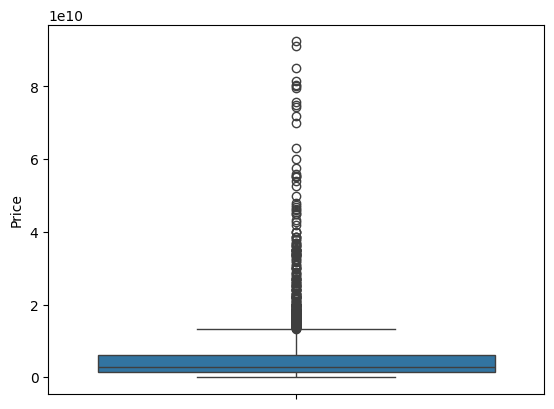

In [47]:
# TODO: Visualize the distribution of prices from the dataset using a boxplot.
sns.boxplot(data["Price"])

In [48]:
# TODO: Calculate the skewness of each numerical column in the dataset.
data.skew(axis=0, numeric_only=True)

Room          0.639616
Parking      -1.908891
Warehouse    -2.956962
Elevator     -1.391037
Price         4.727793
Price(USD)    4.727793
dtype: float64

**Description**<br>

What are outliers in dataset ?

Answer : Outliers are values at the extreme ends of a dataset.

One of the best method to find out outliers : **Interquartile range method** 

Interquartile range method:

1: Sort your data from low to high<br>
2: Identify the `first quartile` (Q1), the `median`, and the `third quartile` (Q3).<br>
3: Calculate your `IQR = Q3 – Q1`<br>
4: Calculate your upper fence = `Q3 + (1.5 * IQR)`<br>
5: Calculate your lower fence = `Q1 – (1.5 * IQR)`<br>
6: Use your fences to highlight any outliers, all values that fall outside your fences.<br>
7: Your outliers are any values **greater than your upper fence or less than your lower fence**.<br>


In [49]:
# TODO: Define a function named "Interquartile_Range" that calculates the interquartile range (IQR) and fences for outlier detection for a given dataframe and target column.
def Interquartile_Range(df,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    u_fence = q3+(1.5 * IQR)
    l_fence = q1-(1.5 * IQR)
    return u_fence, l_fence

In [50]:
# TODO: Use the "Interquartile_Range" function to calculate the interquartile range (IQR) and fences for the 'Price' and 'Area' columns in the dataset.
u_price, l_price = Interquartile_Range(data,'Price')
print(f"Price Upper Fence: {u_price}\nPrice Lower Fence: {l_price}")

u_Area, l_Area = Interquartile_Range(data,'Area')
print(f"\nArea Upper Fence: {u_Area}\nArea Upper Fence: {l_Area}")

Price Upper Fence: 13370000000.0
Price Lower Fence: -5750000000.0

Area Upper Fence: 200.0
Area Upper Fence: -8.0


**Description**<br>
* It must be considered that most outliers are on the right side dut to **Right_skewed** <br>
so , we need to remove outliers on the right(Upper_Fence)

* Among all the features , two of them have noticeable effect : **Area** and **Price** <br>
We cant find out outliers from  (Room , Parking , Warehouse ,Elevator) features.<br>
It's better to find out outliers first from Price , second Area

In [51]:
# TODO: Define upper fence values for the 'Price' and 'Area' columns. Identify and store the indices of data points exceeding these upper fences.
price_exceeding = data[data['Price']>u_price]
area_exceeding = data[data["Area"]>u_Area]
price_exceeding_index = price_exceeding.index
area_exceeding_index = area_exceeding.index

**Description**<br>

* We can use of a method and add all the Outliers which are greater than UpperFence for both Price and Area and then <br>
eliminate them from our Dataset(but in a new variable)

In [52]:
# TODO: Combine the indices of outliers identified for both 'Price' and 'Area' columns. Print the total number and percentage of outliers. Display the first five rows of the dataset for these outliers.
outlier_index = list(set(price_exceeding_index).intersection(area_exceeding_index))
print(f"Total number of outliers: {len(outlier_index)}\nPercentage of outliers: {len(outlier_index)/len(data)*100}")
data.loc[outlier_index].sort_index().head()

Total number of outliers: 145
Percentage of outliers: 4.464285714285714


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
152,245.0,3,True,True,True,Farmanieh,2.695000e+10,898333.33,High,Expensive
166,236.0,4,True,True,True,Gheitarieh,2.000000e+10,666666.67,High,Expensive
169,220.0,3,True,True,True,Heravi,1.540000e+10,513333.33,High,Expensive
182,320.0,4,True,True,True,SaadatAbad,2.400000e+10,800000.00,High,Expensive
188,210.0,3,True,True,True,Pasdaran,1.575000e+10,525000.00,High,Expensive


In [53]:
# TODO: Remove rows identified as outliers from the dataset and print the shape of the prepared dataset. Display the first five rows of the prepared dataset.
data_prepared = data.drop(outlier_index)
print(f"The shape of prepared dataset is: {len(data_prepared)}")
data_prepared.head()

The shape of prepared dataset is: 3103


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,AveUnderMean,cheap
3,95.0,2,True,True,True,ShahrakeQods,9.025000e+08,30083.33,AveUpperMean,cheap
4,123.0,2,True,True,True,ShahrakeGharb,7.000000e+09,233333.33,High,Expensive


<Axes: ylabel='Price'>

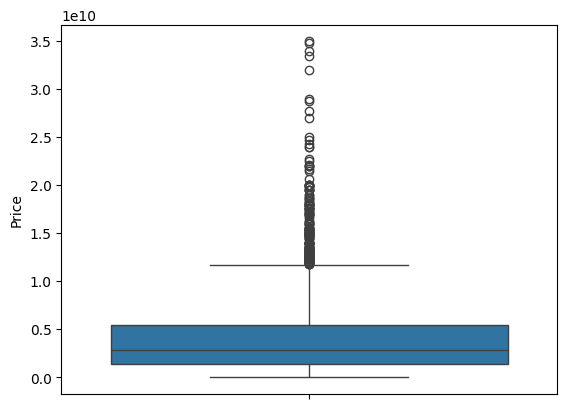

In [54]:
# TODO: Visualize the distribution of prices from the prepared dataset without outliers using a boxplot.
sns.boxplot(data_prepared["Price"])

In [55]:
# TODO: Calculate the skewness of each numerical column in the prepared dataset without outliers.
data_prepared.skew(axis=0, numeric_only=True)

Room          0.376087
Parking      -1.847529
Warehouse    -2.896375
Elevator     -1.381509
Price         2.273048
Price(USD)    2.273048
dtype: float64

**Description**<br>

* Now we have more balanced data and its ready to be used for fitting.
* Due to we have dropped lots of data from dataset we can use of both(with outliers and without) to check the 
accuracy for each one .